### Student Details

Student Name: Dylan Rodrigues

Student ID: 24121479

# Task 2: Probability Theory

I picked the simulated experiment examples that were provided to get an understanding of how to build a simulator and plot the results as my focus was more on getting handon and understanding the basics of machine learning.


## Approach

In the first example I used a random function native to python to generate numbers between 1 and 6. I used a explict for loop to iterate 100 (or 1000) times to get a random number and the gambling outcome.

In the second task I relied more of numpy to generate 1000 samples and mapping marks to cost array.

## Manual Calculations

There were indeed some manual calculations that were necessary for example 2.
<br></br>

Essentially, the key idea is to sample data from a normal distribution. <br></br>

Example 2 states the foll:

statement 1: 99.7% data is within the mean and (+-3) * standard deviation.

statement 2: The mean is 50 & the standard deviation is 15.
<br></br>

From statement 1:

3 * standard deviation = 3 * 15 = 45

-3 * standard deviation = -3 * 15 = -45

mean + 3 * standard deviation = 50 + 45 = 95

mean - 3 * standard deviation = 50 - 45 = 05


Hence most (99.7%) of the data distribution lies between 05 to 95 units (marks).
<br></br>

I used truncnorm from scipy that would help in generating most of the samples between 05 to 95:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html

The values a and b represent the standardized limits for truncation. This is necessary for the truncnorm function, which expects the limits in terms of how many standard deviations away from the mean the truncation points are.

For example, a = (0 - 50) / 15 = -3.33 and b = (100 - 50) / 15 = 3.33. This means the truncated normal distribution will range from -3.33 to 3.33 standard deviations away from the mean.

Hence by simpy pluggin the values of mu=50 and sigma=15, in equations a and b we can instruct the truncnorm function to move +-3.33 standard deviations away.

Generally it is best to stay simple while solving problems but not at the cost of incorrectness. To devise a robust sampling system it was necessary to overthink through certain concepts.




Example 1 given in Task 2:

In [4]:
# Your code
import random

# please change CONST_SIMULATION_COUNTS to 1000
CONST_SIMULATION_COUNTS = 100
def simulate_dice_roll_experiment():
  # using a random number generator to yield a value between 1 and 6
  number = random.randint(1, 6)
  return number

# this is a mapper function which maps the result of the die to a value given in the question
def get_gamble_outcome(number_on_dice):
  if number_on_dice == 1 or number_on_dice == 2 or number_on_dice == 3:
    return -1
  if number_on_dice == 4:
    return 0
  if number_on_dice == 5:
    return 1
  if number_on_dice == 6:
    return 2

def dice_gambling_simulator(simulation_count):
  dice_results = []
  gamble_outcome_results = []
  for i in range(0, simulation_count):
    number_on_dice = simulate_dice_roll_experiment()
    gamble_outcome = get_gamble_outcome(number_on_dice)
    # record the values in the lists
    dice_results.append(number_on_dice)
    gamble_outcome_results.append(gamble_outcome)
  # return a pair where the first element is the dice result and the second element is the gamble outcome result
  return [dice_results, gamble_outcome_results]

# destructure the dice_results and gamble_outcome_results
[dice_results, gamble_outcome_results] = dice_gambling_simulator(CONST_SIMULATION_COUNTS)

print("Dice results: ", dice_results)
print("Gamble outcome results: ", gamble_outcome_results)

Dice results:  [4, 5, 4, 3, 5, 2, 4, 3, 2, 4, 5, 6, 3, 1, 4, 5, 3, 3, 5, 6, 5, 5, 1, 6, 4, 2, 1, 2, 2, 6, 4, 6, 1, 1, 1, 5, 4, 6, 5, 6, 2, 3, 6, 6, 5, 3, 5, 4, 1, 4, 4, 1, 3, 5, 5, 6, 2, 2, 5, 3, 4, 5, 2, 2, 5, 1, 3, 6, 1, 3, 1, 5, 4, 6, 2, 2, 6, 5, 1, 3, 3, 4, 6, 5, 4, 5, 2, 6, 5, 1, 3, 2, 6, 4, 2, 4, 6, 5, 3, 6]
Gamble outcome results:  [0, 1, 0, -1, 1, -1, 0, -1, -1, 0, 1, 2, -1, -1, 0, 1, -1, -1, 1, 2, 1, 1, -1, 2, 0, -1, -1, -1, -1, 2, 0, 2, -1, -1, -1, 1, 0, 2, 1, 2, -1, -1, 2, 2, 1, -1, 1, 0, -1, 0, 0, -1, -1, 1, 1, 2, -1, -1, 1, -1, 0, 1, -1, -1, 1, -1, -1, 2, -1, -1, -1, 1, 0, 2, -1, -1, 2, 1, -1, -1, -1, 0, 2, 1, 0, 1, -1, 2, 1, -1, -1, -1, 2, 0, -1, 0, 2, 1, -1, 2]


In [13]:
print("Expected value of dice results: ", np.mean(dice_results))

Expected value of dice results:  3.74


In [16]:
print("Expected value of gamble outcome results: ", np.mean(gamble_outcome_results))

Expected value of gamble outcome results:  0.15


In [14]:
print("Standard deviation of dice results: ", np.std(dice_results))

Standard deviation of dice results:  1.6710475756243446


In [15]:
print("Standard deviation of gamble outcome results: ", np.std(gamble_outcome_results))

Standard deviation of gamble outcome results:  1.1608186766243902


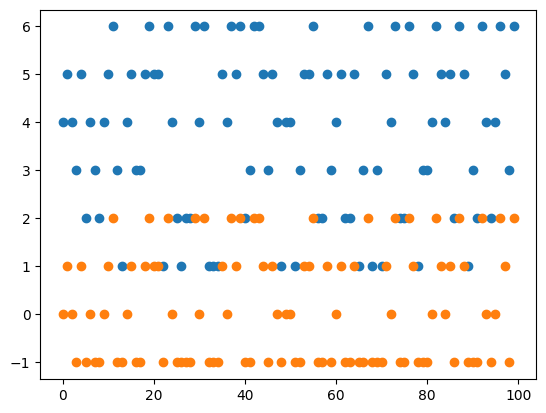

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = list(range(CONST_SIMULATION_COUNTS))
ax.scatter(x, dice_results)
ax.scatter(x, gamble_outcome_results)

If you observe the plot, the blue dots represents the result of the dice roll and the orange dot represents the value of the gamble outcome.

Example 2 given in task 2:

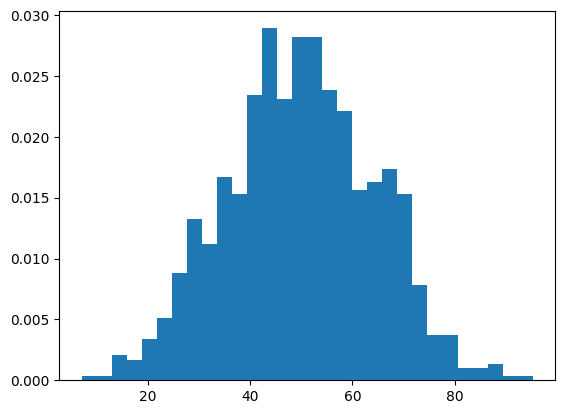

In [19]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

mu, sigma = 50, 15
lower, upper = 0, 100

# truncated normal distribution
a, b = (lower - mu) / sigma, (upper - mu) / sigma
s = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=1000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.show()


In [ ]:
s

In [21]:
s.shape

(1000,)

Calculate the Expectation of the Marks Distribution:

In [22]:
np.mean(s)

49.920840213289395

Calculate the Std. Dev. of the Marks Distribution:

In [23]:
np.std(s)

14.413055851165515

In [ ]:
import numpy as np

# define conditions
conditions = [
    (s <= 50),             # for values <= 50
    (s > 50) & (s <= 75),  # for values between 51 and 75
    (s > 75) & (s <= 100)  # for values between 76 and 100
]

# define corresponding choices for each condition
choices = [
  0,  # If condition 1 is true
  5,  # If condition 2 is true
  10  # If condition 3 is true
]

# default value for when none of the conditions apply
default = -1

# apply conditions and choices using np.select
mapped_arr = np.select(conditions, choices, default=default)

print(mapped_arr)

Plot of the distribution found in the simulated experiment. i.e. After generating the costs based on the marks of the student:

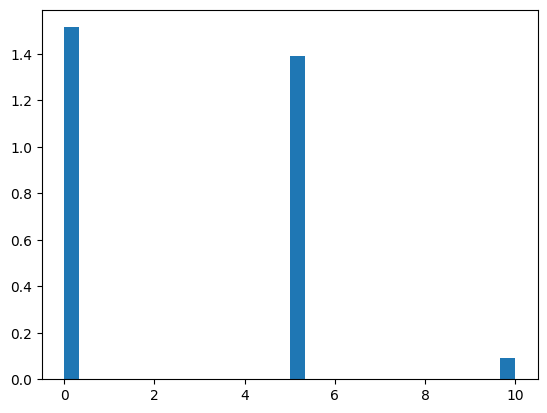

In [25]:
count, bins, ignored = plt.hist(mapped_arr, 30, density=True)

Calculate the Expectation of the Cost Distribution:

In [26]:
np.mean(mapped_arr)

2.63

Calculate the Std. Dev. of the Cost Distribution:

In [27]:
np.std(mapped_arr)

2.789820782774406

My own examples:

1. Claw Machine - A Claw Machine is a device where a person inserts a coin in it and controls the claw to pick up toys. Let's say there are 4 toys of size small, medium & large. It is more difficult to pick up a large toy than a smaller toy, however the reward of picking up a large toy is much more. We can simulate this machine 1000 times to get an idea of the expection of a user (so that the user knows whether it is worth spending money on it). For example, the chance of picking up a small toy is 70%, the chance of picking up a medium toy is 20% and the chance of picking up a large toy is 10%. The person, moreover, gets 10, 7, 3 euros if she manages to picks large, medium and small toys respectively. We can write a python function to simulate this 1000 times and get a feel of what would be the persons expectation.

2. Time taken to to place an order - How long should one wait to place an order given that k people are ahead of them. To get a rough idea, we can sample data from a Gamma Distribution since it is designed for "wait time" used cases. We can sample data from this distribution 1000 times and calculate the expecation and standard deviation. Expectation, again, here would be pretty useful as it will help us to know the wait time o average.

I have not implemented these points 1 & 2. These are just the ideas and the code implemented would be similar to the ones above i.e I will be using similar programmming constructs and numpy and scipy libraries.

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

Make sure that the file: 01_heights_weights_genders.csv is uploaded on the device you are running the notebook.

In [29]:
import numpy as np
import pandas

data = pandas.read_csv('sample_data/01_heights_weights_genders.csv', header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

<Axes: xlabel='Height', ylabel='Weight'>

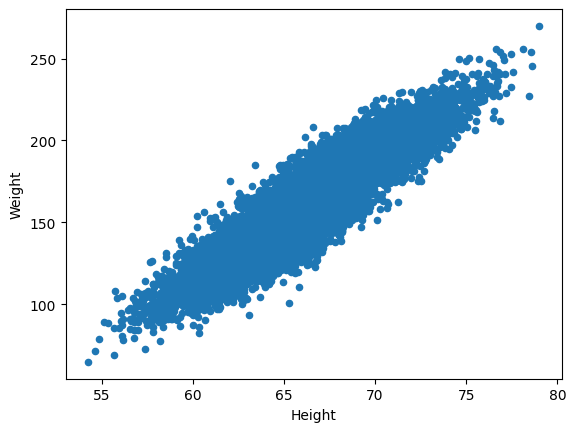

In [30]:
################################
# Your code here
data.plot(kind="scatter", x="Height", y="Weight")

I'm still not convenced that this pattern can be classified. So I'm just checking the first 100 to gain more insight.

NOTE: later on, once the gaussian navies bayes machine is trained I will show the how the data is classified using different colors.

<Axes: xlabel='Height', ylabel='Weight'>

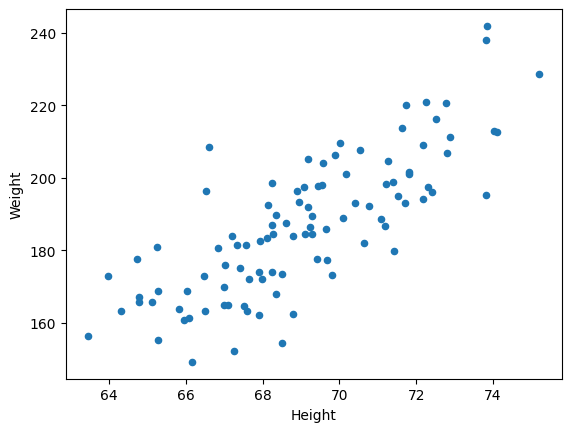

In [31]:
data.head(100).plot(kind="scatter", x="Height", y="Weight")

###### Discuss: Do you think there is resonable separation?

As a fact, men have a higher height & weight as compared to women. There seems to be a reasonable separation as the top right instance can be classified as male and the bottom left instances can be classified as female. The pattern, furthermore, is similar to instaces from the iris dataset. This boosts my confidence that the dataset is separable.

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [32]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [34]:
################################
# Your code here
from sklearn.model_selection import train_test_split

# while splitting X and y into train and test sets respectively, i'm assuming that the order of instances are preserved.
# 42 as the randoms_state has some magical properties in yielding a ideal split. There might be some science behind it.
X_train, X_test = train_test_split(X, test_size=0.33, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.33, random_state=42)

In [35]:
X_train.shape

(6700, 2)

In [36]:
X_test.shape

(3300, 2)

In [37]:
y_train.shape

(6700,)

In [38]:
y_test.shape

(3300,)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [39]:
from sklearn.naive_bayes import GaussianNB

################################
# Your code here
clf = GaussianNB()

clf.fit(X_train, y_train)

GaussianNB()

In [40]:
predicted_labels = clf.predict(X_test)

In [41]:
predicted_labels

array(['Male', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype='<U6')

In [42]:
predicted_labels.shape

(3300,)

### Test the algorithm
Using the test data

In [43]:
from sklearn.metrics import accuracy_score

################################
# Your code here
accuracy_score(y_test, predicted_labels)

0.8863636363636364

### Plot the random samples

You will see a heat map diagram below. Please note that I only used this to get data from a distribution that is close to the the distribution of the original training data was sampled from.

Please note that I am not overthinking things, I'm just visualizing the 2D distribution to get more confident and in depth undesrtanding of some mathematical concepts.

Later on in the norebook, I have plotted the separation of data that is the one of the goals of this task.

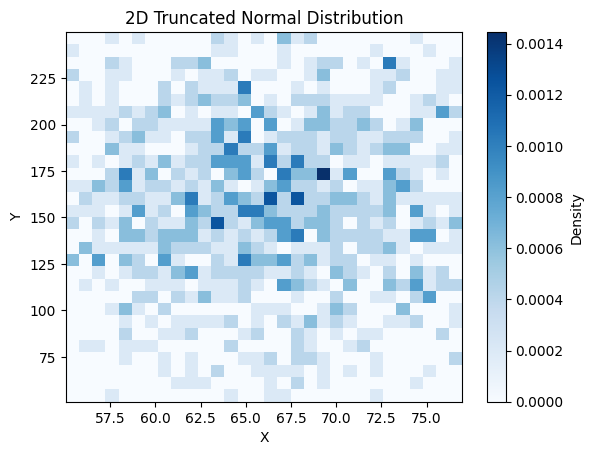

In [44]:
import numpy as np
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

# parameters for the 2D normal distribution

# I have done a lot of calculations and inferences to get the values of 67, 160, 7, 50, 55, 77, 50, 250.
# It is very difficult to explain this in my notebook; I would be happy to disuss, in person, how I got arrived at these numbers.
mu_x, mu_y = 67, 160  # Means for x and y
sigma_x, sigma_y = 7, 50  # Standard deviations for x and y
lower_x, upper_x = 55, 77  # Truncation limits for x
lower_y, upper_y = 50, 250  # Truncation limits for y

# truncate for x dimension
a_x, b_x = (lower_x - mu_x) / sigma_x, (upper_x - mu_x) / sigma_x
x = truncnorm.rvs(a_x, b_x, loc=mu_x, scale=sigma_x, size=1000)

# truncate for y dimension
a_y, b_y = (lower_y - mu_y) / sigma_y, (upper_y - mu_y) / sigma_y
y = truncnorm.rvs(a_y, b_y, loc=mu_y, scale=sigma_y, size=1000)

# plot the results using a 2D histogram (heatmap)
plt.hist2d(x, y, bins=30, cmap='Blues', density=True)
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Truncated Normal Distribution')

# Show the plot
plt.show()

In [45]:
import pandas as pd
generated_heights_weights = pd.DataFrame(
    {
        "Height": x,
        "Weight": y,
    },
)

In [46]:
generated_heights_weights

,Height,Weight
0,68.329162,164.608521
1,72.712741,233.610432
2,71.257398,132.143450
3,65.928475,84.273998
4,72.389767,199.205384
...,...,...
995,59.060661,137.020875
996,64.887753,212.214505
997,71.315666,82.046159
998,64.298672,213.294343


In [48]:
predictions_from_generated_instances = clf.predict(generated_heights_weights)

In [ ]:
predictions_from_generated_instances

In [50]:
predictions_from_generated_instances_data_frame = pd.DataFrame(
    {
        "Gender": predictions_from_generated_instances,
    },
)

In [51]:
predictions_from_generated_instances_data_frame

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
995,Female
996,Male
997,Female
998,Male


In [54]:
# merging the test data that I have generated with the labaels that the classifier generated
# result = pd.merge(generated_heights_weights, predictions_from_generated_instances_data_frame, on='ID', how='inner')  # use 'inner', 'outer', 'left', or 'right' for the join type
result = pd.merge(generated_heights_weights, predictions_from_generated_instances_data_frame, left_index=True, right_index=True, how='inner')

In [55]:
result

,Height,Weight,Gender
0,68.329162,164.608521,Male
1,72.712741,233.610432,Male
2,71.257398,132.143450,Female
3,65.928475,84.273998,Female
4,72.389767,199.205384,Male
...,...,...,...
995,59.060661,137.020875,Female
996,64.887753,212.214505,Male
997,71.315666,82.046159,Female
998,64.298672,213.294343,Male


In [56]:
new_set = pd.concat([generated_heights_weights, predictions_from_generated_instances_data_frame], axis=1)

In [57]:
new_set

,Height,Weight,Gender
0,68.329162,164.608521,Male
1,72.712741,233.610432,Male
2,71.257398,132.143450,Female
3,65.928475,84.273998,Female
4,72.389767,199.205384,Male
...,...,...,...
995,59.060661,137.020875,Female
996,64.887753,212.214505,Male
997,71.315666,82.046159,Female
998,64.298672,213.294343,Male


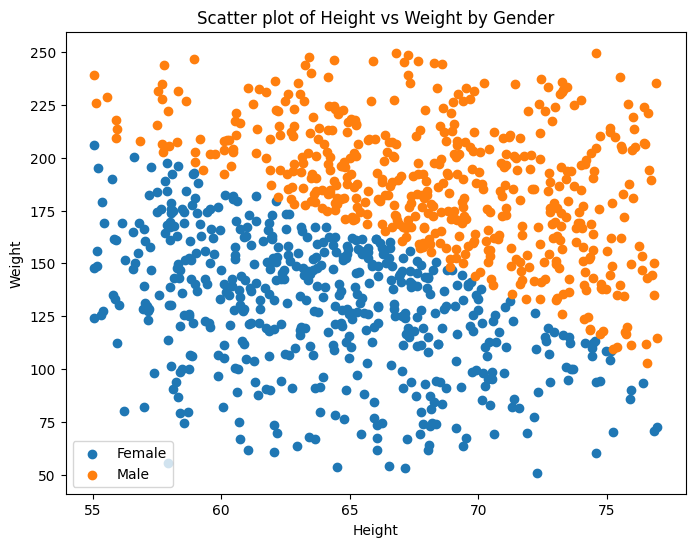

In [58]:
plt.figure(figsize=(8, 6))

# Loop through each label and plot the corresponding points with different colors
for label, group in new_set.groupby('Gender'):
    plt.scatter(group['Height'], group['Weight'], label=label)

# Add title and labels
plt.title('Scatter plot of Height vs Weight by Gender')
plt.xlabel('Height')
plt.ylabel('Weight')

# Add legend to differentiate labels
plt.legend()

# Show the plot
plt.show()

# Task 4: Applications of Reinforcement Learning



  ### Applications of Reinforcement Learning (RL)
  Machine Learning algorithms based on RL have been around since the 1950's. They have, initially been used to simulate a player in certain games such as chess and backgaman (TD-Gammon) and in machine control. These, however, were not in the headlines until the implementation of DeepMind in the year 2013.
  
  In simple words, in RL, an agent is deployed in the environment and makes some decisions based on some observations. If the decision  helps the agent to get closer to the objective, the agent receives a reward, else it would receive a penalty.

  Autonomous Systems, Robotics, Finance, Healthcare, Supply Chain and Logistics and Energy Management are <span style="color:blue">**some of the modern applications**</span> of RL.

  I will share some <span style="color:blue">**insight**</span> (non mathematical) on application of RL in the game of chess and a little bit on Shogi:

  One of the best chess engines, today, is Alpha Zero which essentially employs the tabula rasa reinforcement learning from games of self-play.

  Starting from random play, and given no domain knowledge except the game rules, alphazero achieved within 24 hours a superhuman level of play in the games of chess and shogi (japanese chess) as well as go, and convincingly defeated a world-champion in each case.

  Computer chess programs continued to progress steadily beyond human level in the following two decades. These programs evaluate positions using features handcrafted by human grandmasters and carefully tuned weights, combined with a high-performance alpha-beta search that expands a vast search tree using a large number of clever heuristics and domain-specific adaptations. In the methods the augmentations have been discussed, focusing on the 2016 top chess engine championship (tcec) world-champion stockfish; other strong chess programs, including deep blue, use very similar architectures. Shogi is a significantly harder game, in terms of computational complexity, than chess: it is played on a larger board, and any captured opponent piece changes sides and may subsequently be dropped anywhere on the board. The strongest shogi programs, such as computer shogi association (csa) world-champion elmo, have only recently defeated human champions. These programs use a similar algorithm to computer chess programs, again based on a highly optimised alpha-beta search engine with many domain-specific adaptations.

  ***Supervised learning is unsuitable*** for AlphaZero due to its reliance on labeled data and its inability to handle sequential decision-making and exploration. ***Unsupervised learning lacks*** the necessary reward signals and guidance for decision-making, making it inadequate for training an agent to master complex games through self-play. **Reinforcement learning**, with its focus on learning from interactions and rewards, is better suited for these tasks.

  References:

  Blogs:

  https://www.linkedin.com/pulse/reinforcement-learning-modern-ai-applications-services-jha-yumbc/

  https://www.chess.com/terms/chess-engine

  Research Papers:

  Mastering Chess and Shogi by Self-Play with a
  General Reinforcement Learning Algorithm

  https://arxiv.org/pdf/1712.01815



  




  

